In [2]:
import numpy as np
from matplotlib import pyplot as plt

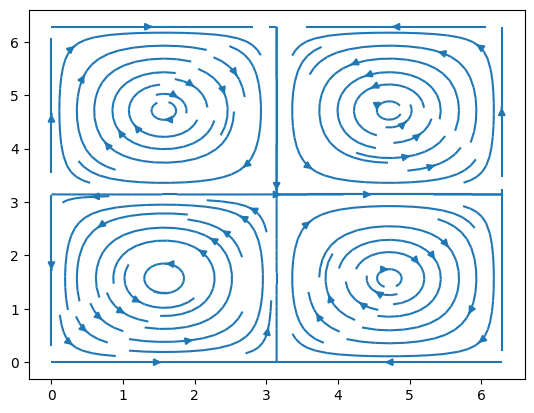

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

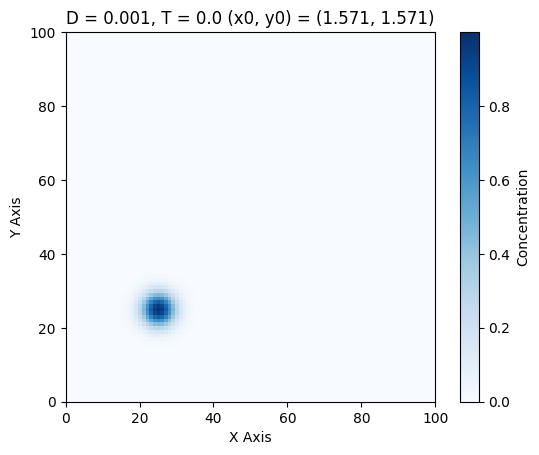

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

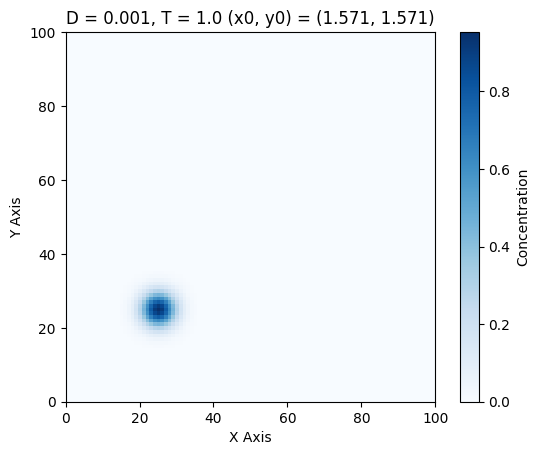

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

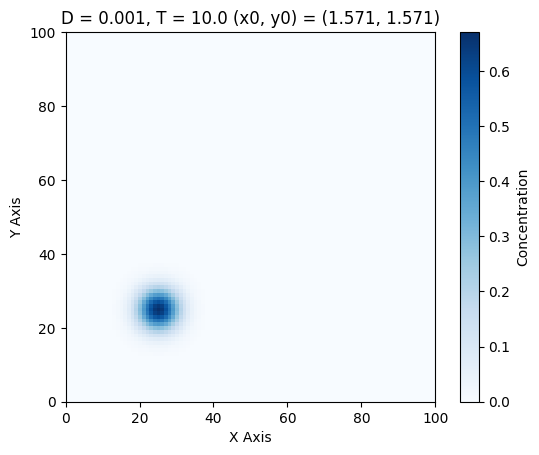

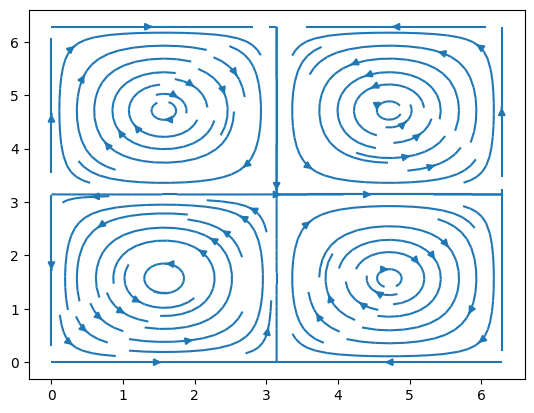

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

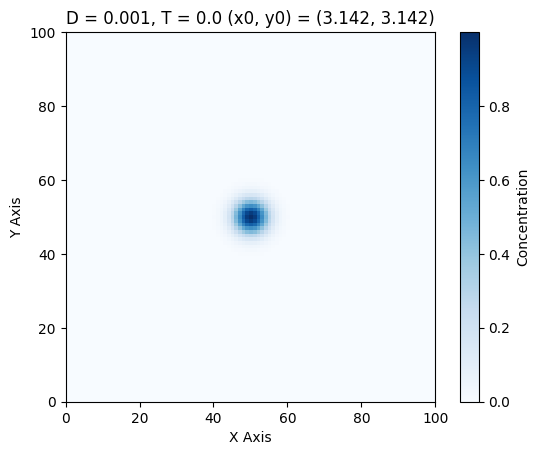

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

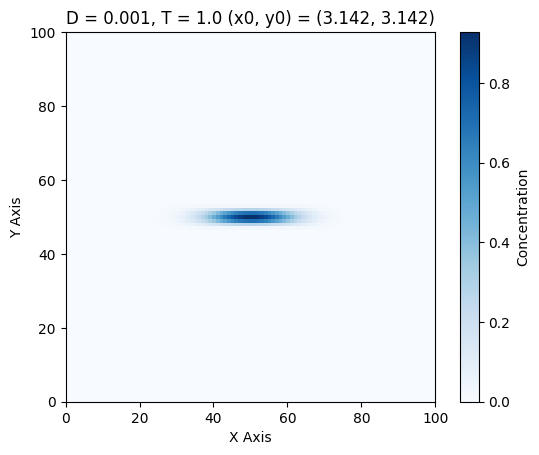

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

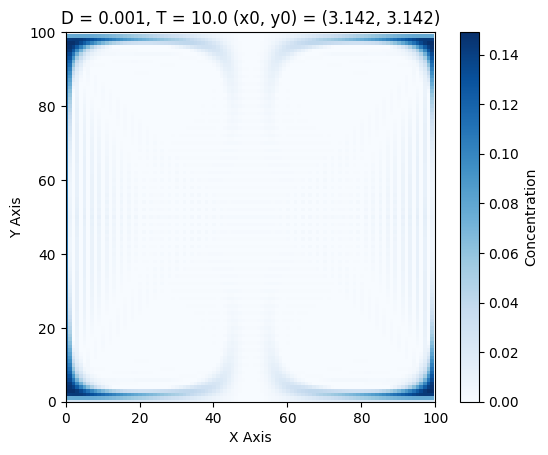

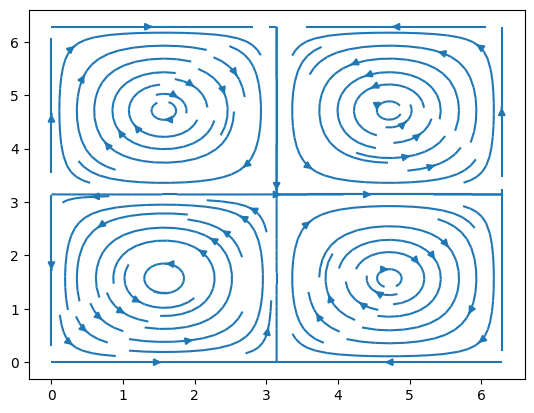

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

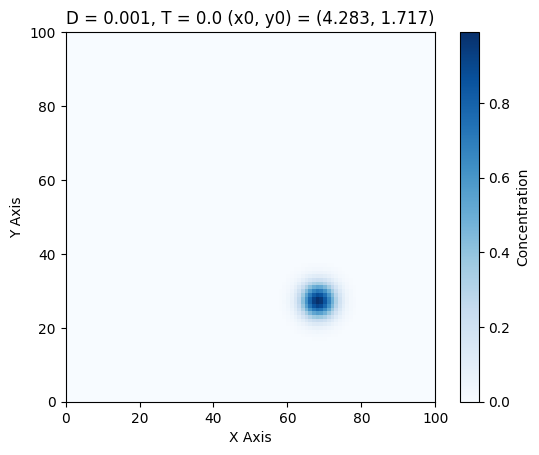

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

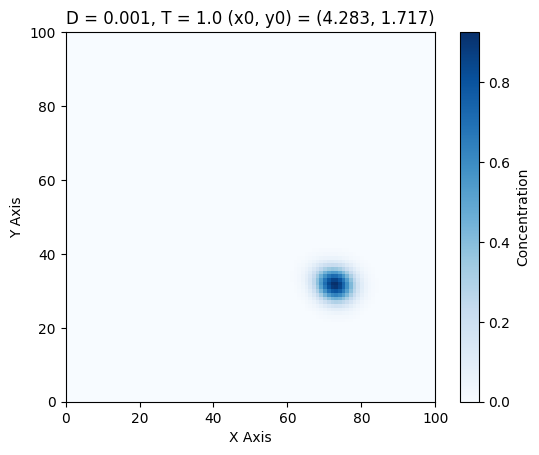

In [ ]:
n = 100
x, y = np.meshgrid(np.linspace(0, 2*np.pi, n+1), np.linspace(0, 2*np.pi, n+1))

u = np.sin(x)*np.cos(y)
v = -np.cos(x)*np.sin(y)

#discrete steps
dx = 2*np.pi / n
dy = 2*np.pi / n
dt = 0.01
D_values = [0.001]

for D in D_values:
  # Arjun's constants
  p = D*dt / (dx*dx)
  q = D*dt / (dy*dy)
  r = u*dt / (2*dy)
  s = v*dt / (2*dx)

  G = np.zeros((n*n, n*n))

  for i in range(n):
    for j in range(n):
      m = n*i+j
      G[m][m] = 1 + 2*(p+q)
      if i > 0:
        G[m][m-n] = - s[i][j] - p
      else:
        G[m][m-n+n*n] = - s[i][j] - p
      if i < n-1:
        G[m][m+n] = s[i][j] - p
      else:
        G[m][m+n-n*n] = s[i][j] - p
      if j > 0:
        G[m][m-1] = - r[i][j] - q
      else:
        G[m][m-1+n] = - r[i][j] - q
      if j < n-1:
        G[m][m+1] = r[i][j] - q
      else:
        G[m][m+1-n] = r[i][j] - q

  H = np.linalg.inv(G)

  # initial conditions
  sigma = 0.2
  initial_conditions = [(np.pi / 2, np.pi / 2), (np.pi, np.pi), ((3-5+2*np.pi)%(2*np.pi), (3+5)%(2*np.pi))]
  for x0, y0 in initial_conditions:
    c = np.exp(-((x-x0)**2 + (y-y0)**2) / (2*(sigma**2)))

    c_array = np.zeros(n*n)
    for i in range(n):
      for j in range(n):
        c_array[n*i+j] = c[i][j]

    T = 0
    endT = 10
    it = 0
    plt.streamplot(x, y, u, v)
    plt.show()
    while T <= endT:
      c_next = np.matmul(H, c_array)
      c_array = c_next
      for i in range(n):
        for j in range(n):
          c[i][j] = c_array[i*n+j]

      if it==0 or it==100 or it==1000:
        plt.imshow(c, vmin=0, cmap='Blues', origin='lower')
        plt.title(f"D = {D}, T = {it / 100} (x0, y0) = {(round(x0, 3), round(y0, 3))}")
        plt.xlabel("X Axis")
        plt.ylabel("Y Axis")
        plt.xlim(0, 100);
        plt.ylim(0, 100);
        # plt.xticks(0, 2*np.pi, 5);
        # plt.yticks(0, 2*np.pi, 5);
        plt.colorbar().set_label("Concentration")
        plt.savefig(f'D={D}_x={round(x0, 3)}_y={round(y0, 3)}_T={it / 100}.png')

        # Download the saved image file
        from google.colab import files
        files.download(f'D={D}_x={round(x0, 3)}_y={round(y0, 3)}_T={it / 100}.png')
        plt.show()
      it+=1
      T+=dt



In [ ]:
# initial conditions
sigma = 0.2
x0 = np.pi;
y0 = np.pi;
c = np.exp(-((x-x0)**2 + (y-y0)**2) / (2*(sigma**2)))

c_array = np.zeros(n*n)
for i in range(n):
  for j in range(n):
    c_array[n*i+j] = c[i][j]

T = 0
endT = 10
it = 0
plt.streamplot(x, y, u, v)
plt.show()
while T <= endT:
  T+=dt
  it+=1

  c_next = np.matmul(H, c_array)
  c_array = c_next
  for i in range(n):
    for j in range(n):
      c[i][j] = c_array[i*n+j]

  if it==100 or it==1000:
    plt.imshow(c, vmin=0, cmap='Blues', origin='lower')
    plt.title(f"Advection diffusion for D = {D} at time T = {it / 1000}")
    plt.xlabel("X Axis")
    plt.ylabel("Y Axis")
    plt.colorbar()
    plt.show()